# Lab: Sentiment classification
First, we import some of libraries, including *vectorizers* and *classifiers*.

In [ ]:
import csv
import pandas as pd
import sklearn.model_selection as skm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Loading data

We use a subset of the *Yelp reviews* dataset: each short text is accompanied with a sentiment label (0 -- negative, 1 -- positive).

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Data Mining & Deep Learning/meld/train/train_sent_emo.csv')
val_data = pd.read_csv('/content/drive/MyDrive/Data Mining & Deep Learning/meld/dev_sent_emo.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Data Mining & Deep Learning/meld/test_sent_emo.csv')

## Data preparation
We split the data into train and test subsets and transform texts into vectors.

In [ ]:
train_text = train_data['Utterance']
y_train_text = train_data['Emotion']

val_text = val_data['Utterance']
y_val_text = val_data['Emotion']

test_text = test_data['Utterance']
y_test_text = test_data['Emotion']
# y_anger = data[data['Emotion'] == 'anger']
# y_joy = data[data['Emotion'] == 'joy']
# y_sadness = data[data['Emotion'] == 'sadness']
# y_disgust = data[data['Emotion'] == 'disgust']
# y_neutral = data[data['Emotion'] == 'neutral']
# y_fear = data[data['Emotion'] == 'fear']
# y_surprise = data[data['Emotion'] == 'surprise']

# print(len(y_anger), len(y_joy), len(y_sadness), len(y_disgust), len(y_neutral), len(y_fear), len(y_surprise))
# X_text_train, X_text_test, y_train, y_test = skm.train_test_split(text, y_text, test_size=0.2, stratify=y_text, random_state=42)
# X_text_newtrain, X_text_val, y_newtrain, y_val = skm.train_test_split(X_text_train, y_train, test_size=(1/8), stratify=y_train, random_state=42)

In [ ]:
X_text_train = []
y_train = []

X_text_val = []
y_val = []

X_text_test = []
y_test = []

unique_values_train = {'anger': 0, 'disgust': 0, 'sadness': 0, 'joy':0, 'fear':0, 'neutral':0, 'surprise': 0}

for i in range(len(y_train_text)):
    value = unique_values_train.get(y_train_text[i])
    if(value < 400):
      value += 1
      unique_values_train[y_train_text[i]] = value
      X_text_train.append(train_text[i])
      y_train.append(y_train_text[i])


print(unique_values_train)
print(len(X_text_train), len(y_train))

unique_values_val = {'anger': 0, 'disgust': 0, 'sadness': 0, 'joy':0, 'fear':0, 'neutral':0, 'surprise': 0}

for i in range(len(y_val_text)):
    value = unique_values_val.get(y_val_text[i])
    if(value < 50):
      value += 1
      unique_values_val[y_val_text[i]] = value
      X_text_val.append(val_text[i])
      y_val.append(y_val_text[i])


print(unique_values_val)
print(len(X_text_val), len(y_val))

unique_values_test = {'anger': 0, 'disgust': 0, 'sadness': 0, 'joy':0, 'fear':0, 'neutral':0, 'surprise': 0}

for i in range(len(y_test_text)):
    value = unique_values_test.get(y_test_text[i])
    if(value < 50):
      value += 1
      unique_values_test[y_test_text[i]] = value
      X_text_test.append(test_text[i])
      y_test.append(y_test_text[i])


print(unique_values_test)
print(len(X_text_test), len(y_test))

{'anger': 400, 'disgust': 271, 'sadness': 400, 'joy': 400, 'fear': 268, 'neutral': 400, 'surprise': 400}
2539 2539
{'anger': 50, 'disgust': 22, 'sadness': 50, 'joy': 50, 'fear': 40, 'neutral': 50, 'surprise': 50}
312 312
{'anger': 50, 'disgust': 50, 'sadness': 50, 'joy': 50, 'fear': 50, 'neutral': 50, 'surprise': 50}
350 350


In [ ]:
list_stop_words = ['english', None]
min_dfs = [1, 0.1, 0.01, 0.001, 0.001]
binaries = [False, True]
lowercases = [False, True]
alphas = [1e-9, 1e-8, 1.0e-7, 1.0e-6, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0, 10.0, 100.0]

best_stop_words = None
best_min_df = None
best_binary = None
best_lowercase = None
best_val_acc = 0
best_alpha = None

for stop_words in list_stop_words:
    for min_df in min_dfs:
        for binary in binaries:
            for lowercase in lowercases:
                vectorizer = CountVectorizer(min_df=min_df, stop_words=stop_words, binary=binary, lowercase=lowercase)
                X_train = vectorizer.fit_transform(X_text_train)
                X_val = vectorizer.transform(X_text_val)

                if X_train.shape[1] > 0:
                    for alpha in alphas:
                        clf = MultinomialNB(alpha=alpha)
                        clf.fit(X_train, y_train)
                        val_acc = accuracy_score(y_val, clf.predict(X_val))

                        if val_acc >= best_val_acc:
                            best_stop_words = stop_words
                            best_min_df = min_df
                            best_binary = binary
                            best_lowercase = lowercase
                            best_val_acc = val_acc
                            best_alpha = alpha

In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df, stop_words=best_stop_words, binary=best_binary, lowercase=best_lowercase)
X_train = vectorizer.fit_transform(X_text_train)
X_test = vectorizer.transform(X_text_test)
X_val = vectorizer.transform(X_text_val)

print('Best parameters are ' + str(best_stop_words) + ' ' + str(best_min_df) + ' ' + str(best_binary) + ' ' + str(best_lowercase))
print('Best validation accuracy is ' + str(best_val_acc) + ' with alpha ' + str(best_alpha))
print('Vocabulary size: ', X_train.shape[1])

Best parameters are None 1 False True
Best validation accuracy is 0.3525641025641026 with alpha 0.1
Vocabulary size:  2463


## Training and testing

We fit a multinomial naive Bayes classifier and test it.

In [ ]:
clf = MultinomialNB(alpha=best_alpha)
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
print('Test set accuracy: %.3f' % accuracy_score(y_test, clf.predict(X_test)))

Test set accuracy: 0.277


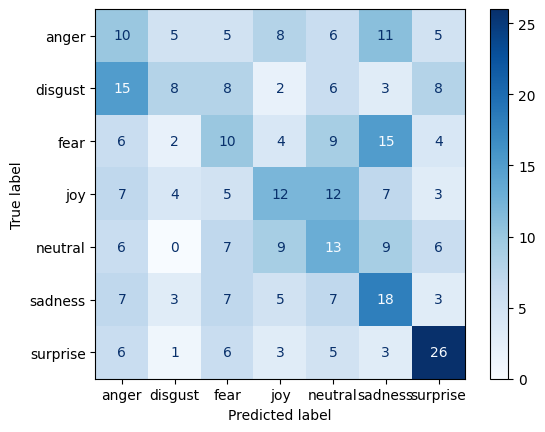

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
    )

#Training and Testing for CountVectorizer and SVC

In [ ]:
#CountVectorizer and SVC
list_stop_words = ['english', None]
min_dfs = [1, 0.1, 0.01, 0.001]
binaries = [False, True]
lowercases = [False, True]

Cs = [0.001, 0.01, 0.1, 1, 10, 100]
kernels = ['linear', 'rbf', 'poly']
gammas = ['scale', 'auto']

best_stop_words = None
best_min_df = None
best_binary = None
best_lowercase = None
best_val_acc = 0
best_C = None
best_kernel = None
best_gamma = None

for stop_words in list_stop_words:
  for min_df in min_dfs:
    for binary in binaries:
      for lowercase in lowercases:
        vectorizer = CountVectorizer(min_df=min_df, stop_words=stop_words, binary=binary, lowercase=lowercase)
        X_train = vectorizer.fit_transform(X_text_train)
        X_val = vectorizer.transform(X_text_val)
        for C in Cs:
          for kernel in kernels:
            for gamma in gammas:
              clf = SVC(C = C, kernel = kernel, gamma = gamma)
              clf.fit(X_train, y_train)
              val_acc = accuracy_score(y_val, clf.predict(X_val))
              if val_acc >= best_val_acc:
                best_stop_words = stop_words
                best_min_df = min_df
                best_binary = binary
                best_lowercase = lowercase
                best_val_acc = val_acc
                best_C = C
                best_kernel = kernel
                best_gamma = gamma

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
vectorizer = CountVectorizer(min_df=best_min_df, stop_words=best_stop_words, binary=best_binary, lowercase=best_lowercase)
X_train = vectorizer.fit_transform(X_text_train)
X_test = vectorizer.transform(X_text_test)
X_val = vectorizer.transform(X_text_val)

print('Best parameters are ' + str(best_stop_words) + ' ' + str(best_min_df) + ' ' + str(best_binary) + ' ' + str(best_lowercase))
print('Best validation accuracy is ' + str(best_val_acc) + ' with C=' + str(best_C) + ' and kernel=' + best_kernel + ' and gamma=' + best_gamma)
print('Vocabulary size: ', X_train.shape[1])

In [ ]:
clf = SVC(C = best_C, kernel = best_kernel, gamma = best_gamma)
clf.fit(X_train, y_train)

In [ ]:
print('Test set accuracy: %.3f' % accuracy_score(y_test, clf.predict(X_test)))

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
)

#Training and Testing for TfidfVectorizer and MultinomialNB

---






In [ ]:
#TfidfVectorizer and MultinomialNB
list_stop_words = ['english', None]
min_dfs = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
binaries = [False, True]
lowercases = [False, True]
alphas = [1.0e-5, 1.0e-4, 1.0e-3,1.0e-2, 1.0e-1, 1.0, 10.0, 100.0]

best_stop_words = None
best_min_df = None
best_binary = None
best_lowercase = None
best_val_acc = 0
best_alpha = None

for stop_words in list_stop_words:
  for min_df in min_dfs:
    for binary in binaries:
      for lowercase in lowercases:
        vectorizer = TfidfVectorizer(min_df=min_df, stop_words=stop_words, binary=binary, lowercase=lowercase)
        X_train = vectorizer.fit_transform(X_text_train)
        X_val = vectorizer.transform(X_text_val)
        for alpha in alphas:
          clf = MultinomialNB(alpha=alpha)
          clf.fit(X_train, y_train)
          val_acc = accuracy_score(y_val, clf.predict(X_val))
          if val_acc >= best_val_acc:
            best_stop_words = stop_words
            best_min_df = min_df
            best_binary = binary
            best_lowercase = lowercase
            best_val_acc = val_acc
            best_alpha = alpha

In [ ]:
vectorizer = TfidfVectorizer(min_df=best_min_df, stop_words=best_stop_words, binary=best_binary, lowercase=best_lowercase)
X_train = vectorizer.fit_transform(X_text_train)
X_test = vectorizer.transform(X_text_test)
X_val = vectorizer.transform(X_text_val)

print('Best parameters are ' + str(best_stop_words) + ' ' + str(best_min_df) + ' ' + str(best_binary) + ' ' + str(best_lowercase))
print('Best validation accuracy is ' + str(best_val_acc) + ' with alpha ' + str(best_alpha))
print('Vocabulary size: ', X_train.shape[1])

In [ ]:
clf = MultinomialNB(alpha=best_alpha)
clf.fit(X_train, y_train)

In [ ]:
print('Test set accuracy: %.3f' % accuracy_score(y_test, clf.predict(X_test)))

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
)

#Training and Testing for TfidfVectorizer and SVC

---






In [ ]:
#TfidfVectorizer and SVC
list_stop_words = ['english', None]
min_dfs = [1, 0.1, 0.01, 0.001, 0.0001]
binaries = [False, True]
lowercases = [False, True]

Cs = [0.001, 0.01, 0.1, 1, 10, 100]
kernels = ['linear', 'rbf', 'poly']
gammas = ['scale', 'auto']


best_stop_words = None
best_min_df = None
best_binary = None
best_lowercase = None
best_val_acc = 0
best_C = None
best_kernel = None
best_gamma = None

for stop_words in list_stop_words:
  for min_df in min_dfs:
    for binary in binaries:
      for lowercase in lowercases:
        vectorizer = TfidfVectorizer(min_df=min_df, stop_words=stop_words, binary=binary, lowercase=lowercase)
        X_train = vectorizer.fit_transform(X_text_train)
        X_val = vectorizer.transform(X_text_val)
        for C in Cs:
          for kernel in kernels:
            for gamma in gammas:
              clf = SVC(C = C, kernel = kernel, gamma = gamma)
              clf.fit(X_train, y_train)
              val_acc = accuracy_score(y_val, clf.predict(X_val))
              if val_acc >= best_val_acc:
                best_stop_words = stop_words
                best_min_df = min_df
                best_binary = binary
                best_lowercase = lowercase
                best_val_acc = val_acc
                best_C = C
                best_kernel = kernel
                best_gamma = gamma

In [ ]:
vectorizer = TfidfVectorizer(min_df=best_min_df, stop_words=best_stop_words, binary=best_binary, lowercase=best_lowercase)
X_train = vectorizer.fit_transform(X_text_train)
X_test = vectorizer.transform(X_text_test)
X_val = vectorizer.transform(X_text_val)

print('Best parameters are ' + str(best_stop_words) + ' ' + str(best_min_df) + ' ' + str(best_binary) + ' ' + str(best_lowercase))
print('Best validation accuracy is ' + str(best_val_acc) + ' with C=' + str(best_C) + ' and kernel=' + best_kernel + ' and gamma=' + best_gamma)
print('Vocabulary size: ', X_train.shape[1])

In [ ]:
clf = SVC(C = best_C, kernel = best_kernel, gamma = best_gamma)
clf.fit(X_train, y_train)

In [ ]:
print('Test set accuracy: %.3f' % accuracy_score(y_test, clf.predict(X_test)))

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
)

#Generalizing

Combination1: CountVectorizer + MultinomialNB:

    Best parameters are None 0.0001 True True

    Best validation accuracy is 0.79 with alpha 0.1

    Vocabulary size:  1622

    Test set accuracy: 0.790

Combination2: CountVectorizer + SVC:

    Best parameters are None 0.0001 True True

    Best validation accuracy is 0.89 with C=100 and kernel=linear and gamma=auto

    Vocabulary size:  1622

    Test set accuracy: 0.780

Combination3: TfidfVectorizer + MultinomialNB:

    Best parameters are None 0.0001 True False

    Best validation accuracy is 0.8 with alpha 1.0

    Vocabulary size:  1825

    Test set accuracy: 0.770
  
Combination4: TfidfVectorizer + SVC

    Best parameters are None 0.0001 True True

    Best validation accuracy is 0.89 with C=100 and kernel=linear and gamma=auto

    Vocabulary size:  1622

    Test set accuracy: 0.820

Overall, the best validation accuracy was seen for CountVectorizer + SVC and TfidfVectorizer + SVC which is 89%, however for test set the first one should comparatevely low accuracy with 78%, while the combination of TfidfVectorizer + SVC had the best among all accuracies 82%